In [1]:
from glob import glob
import pandas as pd
import docx2txt
from win32com import client
import os
from docx import Document 
import PyPDF2
import textract
import spacy
import json
import re
from nltk.tokenize import TweetTokenizer
import string


##### About the libraries used above
* the "glob" function is used to find files with specific extensions in the current directory or a specified directory. The function returns a list of filenames that match the given pattern. The "recursive=True" argument in the last example allows the "glob" function to search for files in subdirectories as well.
* The "doc2txt" module provides a simple interface to extract text from Microsoft Word (.docx) files without the need for Microsoft Word itself or any dependencies from the Microsoft Office suite.
* "from win32com import client" imports the "client" module from the "win32com" package in Python. The "win32com" package is a part of the "pywin32" library, which provides access to many of the Windows APIs and allows you to interact with various Microsoft Office applications like Word, Excel, PowerPoint, Outlook, and more.
  The "client" module specifically provides an interface to create and manipulate COM (Component Object Model) objects, which are used for communication between different software components on Windows systems.
* The "os" module is a built-in module in Python that provides a way to interact with the operating system, allowing you to perform various operating system-related tasks like file operations, directory operations, environment variables, and more.
* "PyPDF2" is a popular third-party library that allows you to work with PDF files in Python. With this library, you can perform various operations on PDF documents, such as merging PDFs, splitting them, rotating pages, extracting text and images, encrypting and decrypting, and more.
*  "textract" is a third-party library that provides a simple interface to extract text from various types of documents and files without the need for external software dependencies. It supports a wide range of file formats, including PDF, Microsoft Word (.docx), Microsoft Excel (.xlsx), PowerPoint (.pptx), plain text files, and more.
* "spaCy" is a popular third-party natural language processing (NLP) library that provides a wide range of functionalities for working with textual data. It is designed to be efficient, fast, and easy to use, making it a popular choice for tasks such as text processing, named entity recognition, part-of-speech tagging, dependency parsing, and more.
* The "json" module is a built-in module in Python that provides methods to work with JSON (JavaScript Object Notation) data, which is a lightweight data interchange format commonly used for data serialization and communication between applications.
* The "re" module is a built-in module that provides support for regular expressions (regex) in Python. Regular expressions are powerful and flexible patterns that can be used for pattern matching and text manipulation.
* "TweetTokenizer" class from the "nltk.tokenize" module in Python. "NLTK" stands for Natural Language Toolkit, and it is a popular third-party library for natural language processing (NLP) tasks in Python.
* The "TweetTokenizer" class is a specialized tokenizer designed to handle tokenization of tweets or other social media texts. Tokenization is the process of splitting a text into individual units, such as words or phrases, which are known as tokens.
* The "string" module is a built-in module that provides various constants and functions related to string manipulation. you can use its contents to perform tasks like generating string constants, removing punctuation from strings, converting strings to lowercase or uppercase, and more.


In [2]:
# Accessing the path based on the resume category folder
files1 = glob("E:\MySpace\Sci_data\p268project\Resumes\Peoplesoft resumes\\*")
files2 = glob("E:\MySpace\Sci_data\p268project\Resumes\React\\*")
files3 = glob("E:\MySpace\Sci_data\p268project\Resumes\SQL Developer Lightning insight\\*")
files4 = glob("E:\MySpace\Sci_data\p268project\Resumes\workday resumes\\*")

In [3]:
# checking the no. of elements at the paths
print("Peoplesoft",len(files1))
print("React",len(files2))
print("SQL",len(files3))
print("Workday",len(files4))

Peoplesoft 20
React 24
SQL 14
Workday 21


In [4]:
# Creating funtion for reading doc files
def docReader(doc_file_name): 
    ## 1) Initiate an object that interfaces to MS Word
    word = client.Dispatch("Word.Application")
    word.Visible = False 
    
    ## 2) Open the Word document to read in
    _ = word.Documents.Open(doc_file_name)

    ## 3) quit the Word application.
    doc = word.ActiveDocument
    paras = doc.Range().text    
    doc.Close()
    word.Quit()
    return paras


**First Reading Peoplesoft files**

In [5]:
# Importing the data present in files1 (People soft)

data1 = []     # empty list
for i in range(len(files1)):
    if files1[i].endswith('docx'): # if .docx file use dox2txt lib
        x = docx2txt.process(files1[i])
        data1.append(x)
    if files1[i].endswith('doc'): # if .doc file use docReader lib
        y = docReader(files1[i])
        data1.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files1[i].endswith('pdf'):  # if .pdf file use PyPDF2 lib
        z = PyPDF2.PdfReader(files1[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data1.append(z1)



In [6]:
len(data1)

20

In [7]:
data1 = pd.DataFrame(data=data1,columns=['data']) # converting data1 list into DataFrame and clolumn name data

In [8]:
data1['category'] = 'Peoplesoft' # Creating new column with column name category and assigning "peoplesoft" to every row

In [9]:
data1

,data,category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft
2,PeopleSoft Database Administrator\r ...,Peoplesoft
3,Classification: Internal\n\nClassification: In...,Peoplesoft
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft
8,Vinod Akkala ...,Peoplesoft
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft


In [10]:
# Adding file Name column and assinging name
name1 = []
for i in range(len(files1)): #taking file name in list name1
    temporary = files1[i].split('\\')
    name1.append(temporary[-1])
names1 = []
for i in range(len(name1)):  # removing extension from the file name & saving in names1 list
    d = name1[i].split('.')
    names1.append(d[0])

In [11]:
print(len(names1))
names1

20


['Peoplesoft Admin_AnubhavSingh',
 'Peoplesoft Admin_G Ananda Rayudu',
 'Peoplesoft Admin_Gangareddy',
 'Peoplesoft Admin_Murali',
 'Peoplesoft Admin_Priyanka Ramadoss',
 'Peoplesoft Admin_SirazuddinMohammad',
 'Peoplesoft Admin_srinivasarao',
 'Peoplesoft Admin_Varkala Vikas',
 'Peoplesoft Admin_Vinod Akkala',
 'PeopleSoft DBA_Ganesh Alladi',
 'PeopleSoft DBA_Vivekanand Sayana',
 'Peoplesoft Finance_Arun Venu',
 'Peoplesoft Finance_Pritam Biswas',
 'Peoplesoft Finance_Rahul Ahuja',
 'Peoplesoft FSCM_HariNarayana',
 'Peoplesoft FSCM_Murali',
 'Peoplesoft FSCM_PriyabrataHota',
 'Peoplesoft FSCM_R Ahmed',
 'Peoplesoft FSCM_SUJATHA',
 'Resume_Subha Santosh_Peoplesoft FSCM']

In [12]:
names1 = pd.DataFrame(data = names1,columns=["Name"]) #saving dataframe taking data from names1 and column name "Name"

In [13]:
data1 = pd.concat([data1,names1],axis=1) #adding Name column to existing dataset data1

In [14]:
data1

,data,category,Name
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Peoplesoft Admin_AnubhavSingh
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu
2,PeopleSoft Database Administrator\r ...,Peoplesoft,Peoplesoft Admin_Gangareddy
3,Classification: Internal\n\nClassification: In...,Peoplesoft,Peoplesoft Admin_Murali
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,Peoplesoft Admin_SirazuddinMohammad
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft,Peoplesoft Admin_srinivasarao
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,Peoplesoft Admin_Varkala Vikas
8,Vinod Akkala ...,Peoplesoft,Peoplesoft Admin_Vinod Akkala
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft,PeopleSoft DBA_Ganesh Alladi


**Second Reading React JS files**

In [15]:
# Importing the data present in second file (React JS Developer)
data2 = []
for i in range(len(files2)):
    if files2[i].endswith('docx'):
        x = docx2txt.process(files2[i])
        data2.append(x)
    if files2[i].endswith('doc'):
        y = docReader(files2[i])
        data2.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files2[i].endswith('pdf'):
        z = PyPDF2.PdfReader(files2[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data2.append(z1)

In [16]:
len(data2)

24

In [17]:
data2 = pd.DataFrame(data=data2,columns=['data']) #creating dataframe with column name data

In [18]:
data2['category'] = 'React JS Developer' # Creating column with column name category and assigning "React JS Developer" to every row 

In [19]:
data2

,data,category
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,\r\r PROFILE\rSearching for the opportunity ...,React JS Developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer


In [20]:
# Adding file Name column and assinging name
name2 = []
for i in range(len(files2)): #taking file name in list name2
    temporary = files2[i].split('\\')
    name2.append(temporary[-1])
names2 = []
for i in range(len(name2)):  # removing extension from the file name & saving in names2 list
    d = name2[i].split('.')
    names2.append(d[0])

names2 = pd.DataFrame(data = names2,columns=["Name"]) #saving dataframe taking data from names2 and column name "Name"
data2 = pd.concat([data2,names2],axis=1) # adding names column to data2

In [21]:
data2

,data,category,Name
0,Name: Ravali P \n\n\n\n ...,React JS Developer,Internship_Ravali_Musquare Technologies (1)
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer,Internship_Susovan Bag_Musquare Technologies
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer,React Developer_Deepakreddy
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer,React Developer_Haripriya
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer,React Developer_Kamalakar Reddy
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer,React Developer_Naveen sadhu
6,\r\r PROFILE\rSearching for the opportunity ...,React JS Developer,React Developer_PavasGoswami
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer,React Developer_Pragnya
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer,React Developer_Sarala Madasu-converted
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer,React Developer_Thirupathiamma


**Third Reading SQL Developer files**

In [22]:
# Importing the data present in third folder (SQL Developer)
data3 = []
for i in range(len(files3)):
    if files3[i].endswith('docx'):
        x = docx2txt.process(files3[i])
        data3.append(x)
    if files3[i].endswith('doc'):
        y = docReader(files3[i])
        data3.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files3[i].endswith('pdf'):
        z = PyPDF2.PdfReader(files3[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data3.append(z1)

In [23]:
len(data3)

14

In [24]:
data3 = pd.DataFrame(data=data3,columns=['data']) #creating dataframe with column name data

In [25]:
data3['category'] = 'SQL Developer' # Creating column with column name category and assigning "SQL Developer" to every row 

In [26]:
# Adding file Name column and assinging name
name3 = []
for i in range(len(files3)): #taking file name in list name3
    temporary = files3[i].split('\\')
    name3.append(temporary[-1])
names3 = []
for i in range(len(name3)):  # removing extension from the file name & saving in names3 list
    d = name3[i].split('.')
    names3.append(d[0])

names3 = pd.DataFrame(data = names3,columns=["Name"]) #saving dataframe taking data from names3 and column name "Name"
data3 = pd.concat([data3,names3],axis=1) # adding names column to data3

In [27]:
data3

,data,category,Name
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer,Anil kumar
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer,AradhanaTripathi[4_0]
2,BUDDHA VAMSI ...,SQL Developer,Buddha Vamsi
3,KAMBALLA PRADEEP ...,SQL Developer,kamballapradeep
4,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer,Nazeer Basha
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer,Neeraj Mishra
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer,premsai
7,SQL SER...,SQL Developer,Priyanka L
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer,PSyamKumar[2_3]
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer,Rajupavanakumari[2_10]


**Forth reading workday files**

In [28]:
# Importing the data present in 4th file (workday)
data4 = []
for i in range(len(files4)):
    if files4[i].endswith('docx'): # if .docx file use dox2txt lib
        x = docx2txt.process(files4[i])
        data4.append(x)
    if files4[i].endswith('doc'): # if .doc file use docReader lib
        y = docReader(files4[i])
        data4.append(y)
        [a for a in y.replace('\x07', '\r').split('\r') if a]
    if files4[i].endswith('pdf'):    # if .doc file use pyPDF2 lib
        z = PyPDF2.PdfReader(files4[i])
        z1 = ''
        for j in range(len(z.pages)):
            m = z.pages[j].extract_text()
            z1 = z1 + m
        data4.append(z1)

In [29]:
len(data4)

21

In [30]:
data4 = pd.DataFrame(data=data4,columns=['data']) #creating dataframe with column name data

data4['category'] = 'workday' # Creating column with column name category and assigning "workday" to every row

In [31]:
# Adding file Name column and assinging name
name4 = []
for i in range(len(files4)): #taking file name in list name4
    temporary = files4[i].split('\\')
    name4.append(temporary[-1])
names4 = []
for i in range(len(name4)):  # removing extension from the file name & saving in names4 list
    d = name4[i].split('.')
    names4.append(d[0])

names4 = pd.DataFrame(data = names4,columns=["Name"]) #saving dataframe taking data from names4 and column name "Name"
data4 = pd.concat([data4,names4],axis=1) # adding names column to data4

In [32]:
data4

,data,category,Name
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,ChinnaSubbarayuduM_Hexaware
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday,Gopi Krishna_Hexaware
2,Hari Krishna M\r\r\rSummary:\rA result oriente...,workday,Hari Krishna M_Hexaware
3,Harikrishna Akula ...,workday,Harikrishna Akula_Hexaware
4,HIMA.MENDU\r \r\rCareer Objective\rTo continu...,workday,Hima Mendu_Hexaware
5,G Himaja\n\n ...,workday,Himaja G_(Hexaware)
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...,workday,J
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,Jyotiverma_Heaware
8,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...,workday,Madeeswar A_Hexaware
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday,MooraboyinaGuravaiah_Hexaware


**Creating 1 dataframe from 4 data files using concatinate**

In [33]:
df = pd.DataFrame()
data_all = [data1,data2,data3,data4]
for subDF in data_all:
    df = pd.concat([df, subDF],ignore_index=True)

In [34]:
df

,data,category,Name
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Peoplesoft Admin_AnubhavSingh
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu
2,PeopleSoft Database Administrator\r ...,Peoplesoft,Peoplesoft Admin_Gangareddy
3,Classification: Internal\n\nClassification: In...,Peoplesoft,Peoplesoft Admin_Murali
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss
...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,workday,Sri Krishna S_Hexaware
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth-Hexaware
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,SSKumar_Hexaware
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday,Venkateswarlu B_Hexaware


**all files data added in 1 dataframe df**

In [35]:
#using the spaCy library to load a pre-trained English language model named 'en_core_web_sm'
websm = spacy.load('en_core_web_sm')

In [36]:
skills = []  #creating empty list
for i in range(len(df.data)):
    rejoin = websm(" ".join(df.data[i].split('\n'))) # we have splitted our data with new line '\n and rejoined with space. 
    upr = []
    for ent in rejoin.ents:
      if ent.label_.upper() == 'ORG': 
        upr.append(ent.text)
    skills.append(upr) # appending all skills to the list skills

In [37]:
skills

[['Shell Scripting    Application',
  'PeopleSoft HCM',
  'FINANCIALS',
  'Oracle    Repository',
  'Github    Core Competencies',
  'Shell Scripting    Application',
  'PeopleSoft HCM',
  'FINANCIALS',
  'Oracle    Repository',
  'PeopleSoft Administration',
  'Github    Managing PeopleSoft HCM',
  'PeopleSoft',
  'Project Migration',
  'WebLogic',
  'CPU',
  'Reviewing Vulnerabilities',
  'Security Teams',
  'RMIS',
  'DPK',
  'Working Knowledge of Ansible',
  'Shell',
  'Shell Script',
  'TechMahindra\t\t\t\t\t\t\t\t\t  \t\t\tRole/Project: Application Support through Automation/Devops Tools',
  'PeopleSoft',
  'PeopleSoft Administration',
  'Upgrade & HCM 9.2 Application Upgrade  \t\t\tProject',
  'Working on Ansible',
  'Worked on Elastic Search Configuration',
  'PeopleSoft',
  'AWS Resources',
  'Configuration Management & Deployment Tool',
  'IBM',
  'WebLogic',
  'CPU',
  'Working on Vulnerabilities',
  'Security Teams',
  'Amazon Web Service',
  'PeopleSoft',
  'Application Se

In [38]:
df['skills']=0  # creating new columns skills in df and assiging 0 to every row
for i in range(len(df.skills)):
    df.skills[i] = skills[i]   #now assighning skill list data into df skill column

C:\Users\amit.g\AppData\Local\Temp\ipykernel_14676\1535388788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.skills[i] = skills[i]   #now assighning skill list data into df skill column


In [39]:
df

,data,category,Name,skills
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,Peoplesoft Admin_AnubhavSingh,"[Shell Scripting Application, PeopleSoft HC..."
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,"[PeopleSoft, Human Capital Management (HCM, Fi..."
2,PeopleSoft Database Administrator\r ...,Peoplesoft,Peoplesoft Admin_Gangareddy,[PeopleSoft Database Administrator\r ...
3,Classification: Internal\n\nClassification: In...,Peoplesoft,Peoplesoft Admin_Murali,"[Murali \t\tExperience Summary, PeopleSoft ..."
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,"[MountPleasant, Coonoor, Peoplesoft Admin, Peo..."
...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,workday,Sri Krishna S_Hexaware,"[HCM, EIB, EIB, PECI, PICOF, Cloud Connectors,..."
75,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth-Hexaware,"[WORKDAY, PROFESSIONAL EXPERIENCE, Studio, Cor..."
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,SSKumar_Hexaware,"[WORKDAY, HCM, FCM, Workday Consultant Pro..."
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday,Venkateswarlu B_Hexaware,"[Maintaining Workday HCM Reporting and, Integr..."


In [40]:
df.to_csv('dataS.csv') #saving dataframe as csv file

**as we copied data column data into skills column by using space and rejioin with space, we can drop data column**

In [41]:
df.drop('data', axis=1, inplace=True) 

In [42]:
df

,category,Name,skills
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,"[Shell Scripting Application, PeopleSoft HC..."
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,"[PeopleSoft, Human Capital Management (HCM, Fi..."
2,Peoplesoft,Peoplesoft Admin_Gangareddy,[PeopleSoft Database Administrator\r ...
3,Peoplesoft,Peoplesoft Admin_Murali,"[Murali \t\tExperience Summary, PeopleSoft ..."
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,"[MountPleasant, Coonoor, Peoplesoft Admin, Peo..."
...,...,...,...
74,workday,Sri Krishna S_Hexaware,"[HCM, EIB, EIB, PECI, PICOF, Cloud Connectors,..."
75,workday,Srikanth-Hexaware,"[WORKDAY, PROFESSIONAL EXPERIENCE, Studio, Cor..."
76,workday,SSKumar_Hexaware,"[WORKDAY, HCM, FCM, Workday Consultant Pro..."
77,workday,Venkateswarlu B_Hexaware,"[Maintaining Workday HCM Reporting and, Integr..."


## Exploratory Data Analysis

* :-converting every string into lower case

In [43]:
for i in range(len(df.skills)):
    lower_words=[Text.lower() for Text in df.skills[i]]
    df.skills[i] = lower_words

In [44]:
df.skills

0     [shell scripting    application, peoplesoft hc...
1     [peoplesoft, human capital management (hcm, fi...
2     [peoplesoft database administrator\r          ...
3     [murali    \t\texperience summary, peoplesoft ...
4     [mountpleasant, coonoor, peoplesoft admin, peo...
                            ...                        
74    [hcm, eib, eib, peci, picof, cloud connectors,...
75    [workday, professional experience, studio, cor...
76    [workday, hcm, fcm, workday consultant     pro...
77    [maintaining workday hcm reporting and, integr...
78    [workday (core hcm, supervisory organization, ...
Name: skills, Length: 79, dtype: object

**splitting the skill column words by deliting comma(,) , new line \n and new tab \t**

In [45]:
for i in range(len(df.skills)):
    list1 =[]
    for j in range(len(df.skills[i])):
        list2 = re.split(r'[,(\n\t:]', df.skills[i][j])
        list1 = list1 + list2
    df.skills[i] = list1

In [46]:
df.skills

0     [shell scripting    application, peoplesoft hc...
1     [peoplesoft, human capital management , hcm, f...
2     [peoplesoft database administrator\r          ...
3     [murali    , , experience summary, peoplesoft ...
4     [mountpleasant, coonoor, peoplesoft admin, peo...
                            ...                        
74    [hcm, eib, eib, peci, picof, cloud connectors,...
75    [workday, professional experience, studio,  co...
76    [workday, hcm, fcm, workday consultant     pro...
77    [maintaining workday hcm reporting and, integr...
78    [workday , core hcm,  supervisory organization...
Name: skills, Length: 79, dtype: object

In [47]:
df.isnull().sum() # checking for null values

category    0
Name        0
skills      0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  79 non-null     object
 1   Name      79 non-null     object
 2   skills    79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


**fixing duplicates**

In [49]:
from collections import Counter

In [50]:
# finding the duplicat values
for i in range(len(df.skills)):
    numbers = df.skills[i]
    counts = dict(Counter(numbers))
    duplicates = {key:value for key, value in counts.items() if value > 1}
    print(duplicates)

{'shell scripting    application': 2, 'peoplesoft hcm': 2, 'financials': 2, 'oracle    repository': 2, 'peoplesoft administration': 2, 'peoplesoft': 8, 'weblogic': 3, 'cpu': 2, 'security teams': 2, '': 18, 'application servers': 2, 'pum': 2, 'upgraded people tool 8.53': 2}
{'peoplesoft': 13, 'dpk': 2, 'weblogic': 4, 'jdk': 2, 'sys': 2, 'ddd': 2, 'application': 2, 'download updates': 2, 'fixes': 3}
{'peoplesoft server administration - expertise': 2, 'sql': 3, 'peoplesoft': 3, 'oracle ses': 2, 'ssl': 2, 'pum': 2, 'application server': 2, 'ms-sql server': 2, 'peoplesoft administrator/dba\renvironment': 2, '': 2}
{'application': 3, 'process': 3, 'stat': 2, 'oracle': 2, 'people soft': 3, 'performing post': 3, 'dates  organization  role': 2, 'peoplesoft reporting': 2, 'pum': 2}
{'peoplesoft': 7, 'ppm': 2}
{'hcm': 3, 'peopletools': 2, 'peoplesoft': 7}
{'peoplesoft administrator': 2, 'peoplesoft': 26, 'pia': 9, 'integration broker': 2, 'installed elastic': 2, 'pum': 4, 'sysaudit': 6, 'sql': 10

In [51]:
# removing Duplicates
for i in range(len(df.skills)):
    remove = set(df.skills[i])
    df.skills[i] = list(remove)

In [52]:
# finding the duplicat values again
for i in range(len(df.skills)):
    numbers = df.skills[i]
    counts = dict(Counter(numbers))
    duplicates = {key:value for key, value in counts.items() if value > 1}
    print(duplicates)

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


In [53]:
df.skills

0     [, peoplesoft, upgrade, unix/linux servers, am...
1     [state university, peoplesoft, peoplesoft secu...
2     [, peoplesoft, peoplesoft database administrat...
3     [, sysaudit, peoplesoft, 11, application, appl...
4     [mountpleasant, joseph’s convent anglo indian ...
                            ...                        
74    [position, picof, inbound/outbound, business o...
75    [ps consultant     infosys                    ...
76    [,  lookup as, peoplesoft, ps query’s, xml, th...
77    [aig, picof, workday integrations,  developmen...
78    [,  cost center, eibs, peoplesoft, user based ...
Name: skills, Length: 79, dtype: object

In [54]:
df.dtypes # checking all datatypes

category    object
Name        object
skills      object
dtype: object

In [55]:
df.describe()

,category,Name,skills
count,79,79,79
unique,4,79,77
top,React JS Developer,Peoplesoft Admin_AnubhavSingh,"[, , strong analytical, jquery..."
freq,24,1,2


**Removing the unwanted data like '',' ','s','cs' which contains length upto 2**

In [56]:
for i in range(len(df.skills)):
    list4 = []
    for j in range(len(df.skills[i])):
        if (len(df.skills[i][j]) >= 3) :
            list5 = df.skills[i][j]
            list4 = list4 + [list5]
    df.skills[i] = list4

In [57]:
df

,category,Name,skills
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,"[peoplesoft, upgrade, unix/linux servers, amaz..."
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,"[state university, peoplesoft, peoplesoft secu..."
2,Peoplesoft,Peoplesoft Admin_Gangareddy,"[peoplesoft, peoplesoft database administrator..."
3,Peoplesoft,Peoplesoft Admin_Murali,"[sysaudit, peoplesoft, application, applied pa..."
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,"[mountpleasant, joseph’s convent anglo indian ..."
...,...,...,...
74,workday,Sri Krishna S_Hexaware,"[position, picof, inbound/outbound, business o..."
75,workday,Srikanth-Hexaware,[ps consultant infosys ...
76,workday,SSKumar_Hexaware,"[ lookup as, peoplesoft, ps query’s, xml, the ..."
77,workday,Venkateswarlu B_Hexaware,"[aig, picof, workday integrations, developmen..."


In [58]:
df.skills[0]

['peoplesoft',
 'upgrade',
 'unix/linux servers',
 'amazon web service',
 'weblogic',
 'shell',
 'peoplesoft hcm',
 ' application support through automation/devops tools',
 'imported self signed certificate',
 'github    managing peoplesoft hcm',
 'srm group',
 'reviewing vulnerabilities',
 'oracle    repository',
 'working on ansible',
 'windows & unix/',
 'hcm',
 'peoplesoft administration',
 'refreshed testing',
 'github    core competencies',
 'hrms instance',
 'hrms',
 'implemented peoplesoft interaction hub',
 'upgrade & hcm 9.2 application upgrade  ',
 'instances',
 'peoplesoft skills',
 'prod',
 'techmahindra',
 'role/project',
 'peopletools',
 'dpk',
 'application server',
 'dev',
 'netapp',
 'project',
 'peoplesoft campus application upgrade',
 'terminal server',
 ' peoplesoft administration',
 'peoplesoft application',
 'working knowledge of ansible',
 'financials',
 'project migration',
 'migrations & production',
 'cs 9.0',
 'created instances',
 'security teams',
 'aws re

**Removing all punctuation**

In [59]:
import string
for i in range(len(df.skills)):
    for j in range(len(df.skills[i])):
        df.skills[i][j] = df.skills[i][j].translate(str.maketrans('','',string.punctuation))

In [60]:
for i in range(len(df.skills)):
    for j in range(len(df.skills[i])):
        df.skills[i][j] = ''.join([i for i in df.skills[i][j] if not i.isdigit()])

In [61]:
df.skills[0]

['peoplesoft',
 'upgrade',
 'unixlinux servers',
 'amazon web service',
 'weblogic',
 'shell',
 'peoplesoft hcm',
 ' application support through automationdevops tools',
 'imported self signed certificate',
 'github    managing peoplesoft hcm',
 'srm group',
 'reviewing vulnerabilities',
 'oracle    repository',
 'working on ansible',
 'windows  unix',
 'hcm',
 'peoplesoft administration',
 'refreshed testing',
 'github    core competencies',
 'hrms instance',
 'hrms',
 'implemented peoplesoft interaction hub',
 'upgrade  hcm  application upgrade  ',
 'instances',
 'peoplesoft skills',
 'prod',
 'techmahindra',
 'roleproject',
 'peopletools',
 'dpk',
 'application server',
 'dev',
 'netapp',
 'project',
 'peoplesoft campus application upgrade',
 'terminal server',
 ' peoplesoft administration',
 'peoplesoft application',
 'working knowledge of ansible',
 'financials',
 'project migration',
 'migrations  production',
 'cs ',
 'created instances',
 'security teams',
 'aws resources',
 'r

**Removing all spaces using nltk tokennize**

In [62]:
from nltk.tokenize import word_tokenize
for i in range(len(df.skills)):
    for j in range(len(df.skills[i])):
        df.skills[i][j] = word_tokenize(df.skills[i][j])
        df.skills[i][j] =  ' '.join(df.skills[i][j])

**Removing the unwanted data '',' ','s','cs' which contains length upto 2**

In [63]:
for i in range(len(df.skills)):
    list6 = []
    for j in range(len(df.skills[i])):
        if (len(df.skills[i][j]) >= 3) :
            list7 = df.skills[i][j]
            list6 = list6 + [list7]
    df.skills[i] = list6

In [64]:
df.skills

0     [peoplesoft, upgrade, unixlinux servers, amazo...
1     [state university, peoplesoft, peoplesoft secu...
2     [peoplesoft, peoplesoft database administrator...
3     [sysaudit, peoplesoft, application, applied pa...
4     [mountpleasant, joseph ’ s convent anglo india...
                            ...                        
74    [position, picof, inboundoutbound, business ob...
75    [ps consultant infosys, infosys, condition, et...
76    [lookup as, peoplesoft, ps query ’ s, xml, the...
77    [aig, picof, workday integrations, development...
78    [cost center, eibs, peoplesoft, user based job...
Name: skills, Length: 79, dtype: object

**copying df to new dataframe df1 for further use in code**

In [65]:
df1 = df.copy(deep=True) #Deep copy does copy of the dataframe with all the elements in the original collection by duplicating.any changes made to a copy of the object do not reflect in the original object. 

In [66]:
df1

,category,Name,skills
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,"[peoplesoft, upgrade, unixlinux servers, amazo..."
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,"[state university, peoplesoft, peoplesoft secu..."
2,Peoplesoft,Peoplesoft Admin_Gangareddy,"[peoplesoft, peoplesoft database administrator..."
3,Peoplesoft,Peoplesoft Admin_Murali,"[sysaudit, peoplesoft, application, applied pa..."
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,"[mountpleasant, joseph ’ s convent anglo india..."
...,...,...,...
74,workday,Sri Krishna S_Hexaware,"[position, picof, inboundoutbound, business ob..."
75,workday,Srikanth-Hexaware,"[ps consultant infosys, infosys, condition, et..."
76,workday,SSKumar_Hexaware,"[lookup as, peoplesoft, ps query ’ s, xml, the..."
77,workday,Venkateswarlu B_Hexaware,"[aig, picof, workday integrations, development..."


In [67]:
for i in range(len(df1.skills)):
    df1.skills[i] = " ".join(df1.skills[i]) # converting list into string

In [68]:
df1.skills[0]

'peoplesoft upgrade unixlinux servers amazon web service weblogic shell peoplesoft hcm application support through automationdevops tools imported self signed certificate github managing peoplesoft hcm srm group reviewing vulnerabilities oracle repository working on ansible windows unix hcm peoplesoft administration refreshed testing github core competencies hrms instance hrms implemented peoplesoft interaction hub upgrade hcm application upgrade instances peoplesoft skills prod techmahindra roleproject peopletools dpk application server dev netapp project peoplesoft campus application upgrade terminal server peoplesoft administration peoplesoft application working knowledge of ansible financials project migration migrations production created instances security teams aws resources rmis application servers shell script working on vulnerabilities cpu pum central ibm peopletools installing oracle policy automation windows secure enterprise search installed and configured ses pia psadmin 

**Now doing Tokenization to split paragraphs and sentences into smaller units that can be more easily assigned meaning**

In [69]:
from nltk.tokenize import word_tokenize
for i in range(len(df1.skills)):
    df1.skills[i] = word_tokenize(df1.skills[i]) # tokenization

In [70]:
df1.skills[0]

['peoplesoft',
 'upgrade',
 'unixlinux',
 'servers',
 'amazon',
 'web',
 'service',
 'weblogic',
 'shell',
 'peoplesoft',
 'hcm',
 'application',
 'support',
 'through',
 'automationdevops',
 'tools',
 'imported',
 'self',
 'signed',
 'certificate',
 'github',
 'managing',
 'peoplesoft',
 'hcm',
 'srm',
 'group',
 'reviewing',
 'vulnerabilities',
 'oracle',
 'repository',
 'working',
 'on',
 'ansible',
 'windows',
 'unix',
 'hcm',
 'peoplesoft',
 'administration',
 'refreshed',
 'testing',
 'github',
 'core',
 'competencies',
 'hrms',
 'instance',
 'hrms',
 'implemented',
 'peoplesoft',
 'interaction',
 'hub',
 'upgrade',
 'hcm',
 'application',
 'upgrade',
 'instances',
 'peoplesoft',
 'skills',
 'prod',
 'techmahindra',
 'roleproject',
 'peopletools',
 'dpk',
 'application',
 'server',
 'dev',
 'netapp',
 'project',
 'peoplesoft',
 'campus',
 'application',
 'upgrade',
 'terminal',
 'server',
 'peoplesoft',
 'administration',
 'peoplesoft',
 'application',
 'working',
 'knowledge',
 

**Removing the Stop words “a,” “the,” “is,” “are,”,“for,” etc**

In [71]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # importing stop words

my_stop_words = stopwords.words('english')
my_stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amit.g\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
# removing stop words
for i in range(len(df1.skills)):    
    df1.skills[i] = [word for word in df1.skills[i] if not word in my_stop_words ]

In [73]:
df1.skills[0]

['peoplesoft',
 'upgrade',
 'unixlinux',
 'servers',
 'amazon',
 'web',
 'service',
 'weblogic',
 'shell',
 'peoplesoft',
 'hcm',
 'application',
 'support',
 'automationdevops',
 'tools',
 'imported',
 'self',
 'signed',
 'certificate',
 'github',
 'managing',
 'peoplesoft',
 'hcm',
 'srm',
 'group',
 'reviewing',
 'vulnerabilities',
 'oracle',
 'repository',
 'working',
 'ansible',
 'windows',
 'unix',
 'hcm',
 'peoplesoft',
 'administration',
 'refreshed',
 'testing',
 'github',
 'core',
 'competencies',
 'hrms',
 'instance',
 'hrms',
 'implemented',
 'peoplesoft',
 'interaction',
 'hub',
 'upgrade',
 'hcm',
 'application',
 'upgrade',
 'instances',
 'peoplesoft',
 'skills',
 'prod',
 'techmahindra',
 'roleproject',
 'peopletools',
 'dpk',
 'application',
 'server',
 'dev',
 'netapp',
 'project',
 'peoplesoft',
 'campus',
 'application',
 'upgrade',
 'terminal',
 'server',
 'peoplesoft',
 'administration',
 'peoplesoft',
 'application',
 'working',
 'knowledge',
 'ansible',
 'financ

In [74]:
# joining the words into single document (removing the tokenization)
for i in range(len(df1.skills)):
    df1.skills[i] =  ' '.join(df1.skills[i])

In [75]:
df1.skills[0]

'peoplesoft upgrade unixlinux servers amazon web service weblogic shell peoplesoft hcm application support automationdevops tools imported self signed certificate github managing peoplesoft hcm srm group reviewing vulnerabilities oracle repository working ansible windows unix hcm peoplesoft administration refreshed testing github core competencies hrms instance hrms implemented peoplesoft interaction hub upgrade hcm application upgrade instances peoplesoft skills prod techmahindra roleproject peopletools dpk application server dev netapp project peoplesoft campus application upgrade terminal server peoplesoft administration peoplesoft application working knowledge ansible financials project migration migrations production created instances security teams aws resources rmis application servers shell script working vulnerabilities cpu pum central ibm peopletools installing oracle policy automation windows secure enterprise search installed configured ses pia psadmin sourcetarget upgraded

**Doing Lemitization to break the word down to its root meaning to identify similarities**

#nltk.download('wordnet') 
#nltk.download('omw-1.4') run these before using wordnet
* WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus.
* we can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more.


In [76]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()
for i in range(len(df1.skills)):
    lemmas = []
    for token in df1.skills[i].split():
        lemmas.append(Lemmatizer.lemmatize(token))
    df1.skills[i] = lemmas

In [77]:
# joining the words into single document (removing the tokenization)
for i in range(len(df1.skills)):
    df1.skills[i] =  ' '.join(df1.skills[i])

df1.skills[0]

'peoplesoft upgrade unixlinux server amazon web service weblogic shell peoplesoft hcm application support automationdevops tool imported self signed certificate github managing peoplesoft hcm srm group reviewing vulnerability oracle repository working ansible window unix hcm peoplesoft administration refreshed testing github core competency hrms instance hrms implemented peoplesoft interaction hub upgrade hcm application upgrade instance peoplesoft skill prod techmahindra roleproject peopletools dpk application server dev netapp project peoplesoft campus application upgrade terminal server peoplesoft administration peoplesoft application working knowledge ansible financials project migration migration production created instance security team aws resource rmis application server shell script working vulnerability cpu pum central ibm peopletools installing oracle policy automation window secure enterprise search installed configured s pia psadmin sourcetarget upgraded people tool people

## Visulisation 

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

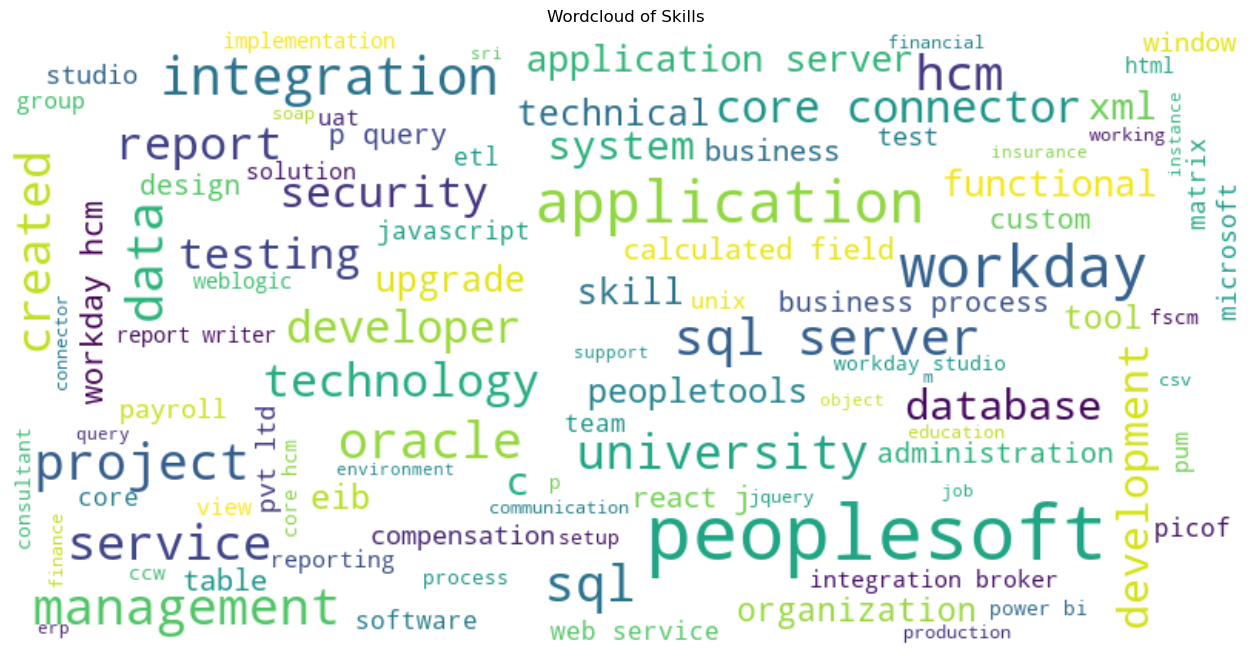

In [79]:
skills_text = ' '.join(df1['skills'].tolist())
wordcloud = WordCloud(width=800, height=400, max_font_size=50, max_words=100, background_color='white').generate(skills_text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Skills')
plt.show()

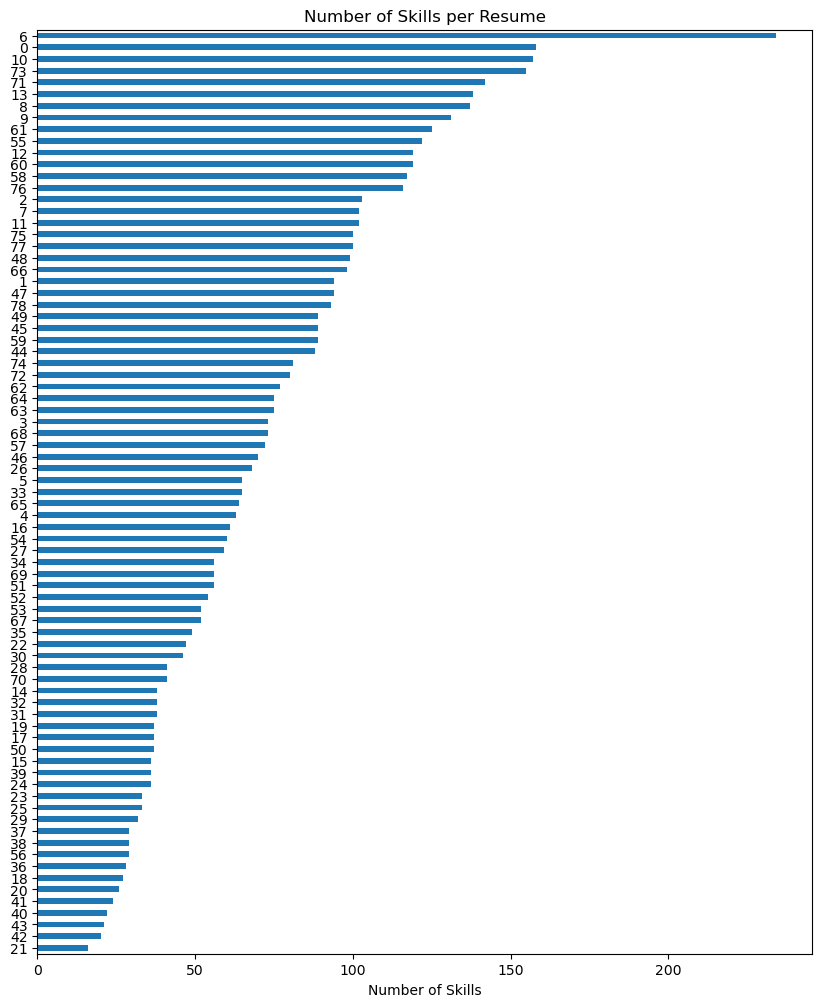

In [80]:
plt.figure(figsize=(10, 12))
df1['skills'].str.split(' ').apply(lambda x: len(x)).sort_values().plot(kind='barh')
plt.title('Number of Skills per Resume')
plt.xlabel('Number of Skills')
plt.show()

In [81]:
df1

,category,Name,skills
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,peoplesoft upgrade unixlinux server amazon web...
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,state university peoplesoft peoplesoft securit...
2,Peoplesoft,Peoplesoft Admin_Gangareddy,peoplesoft peoplesoft database administrator g...
3,Peoplesoft,Peoplesoft Admin_Murali,sysaudit peoplesoft application applied patch ...
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,mountpleasant joseph ’ convent anglo indian gi...
...,...,...,...
74,workday,Sri Krishna S_Hexaware,position picof inboundoutbound business object...
75,workday,Srikanth-Hexaware,p consultant infosys infosys condition etv rep...
76,workday,SSKumar_Hexaware,lookup peoplesoft p query ’ xml functional doc...
77,workday,Venkateswarlu B_Hexaware,aig picof workday integration development test...


In [82]:
#saving df1 as classified_resumes for use in deploying
df1.to_csv('classified_resumes.csv')

In [83]:
# now using string count and regular expression calculating the number of letters, digits, and symbols in the 'Skills' column
df1['Num_Letters'] = df1['skills'].str.count(r'[a-zA-Z]')
df1['Num_Digits'] = df1['skills'].str.count(r'\d')
df1['Num_Symbols'] = df1['skills'].str.count(r'[^\w\s]')

In [84]:
df1

,category,Name,skills,Num_Letters,Num_Digits,Num_Symbols
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,peoplesoft upgrade unixlinux server amazon web...,1184,0,0
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,state university peoplesoft peoplesoft securit...,679,0,0
2,Peoplesoft,Peoplesoft Admin_Gangareddy,peoplesoft peoplesoft database administrator g...,783,0,0
3,Peoplesoft,Peoplesoft Admin_Murali,sysaudit peoplesoft application applied patch ...,439,0,0
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,mountpleasant joseph ’ convent anglo indian gi...,418,0,2
...,...,...,...,...,...,...
74,workday,Sri Krishna S_Hexaware,position picof inboundoutbound business object...,536,0,0
75,workday,Srikanth-Hexaware,p consultant infosys infosys condition etv rep...,604,0,1
76,workday,SSKumar_Hexaware,lookup peoplesoft p query ’ xml functional doc...,776,0,1
77,workday,Venkateswarlu B_Hexaware,aig picof workday integration development test...,628,0,6


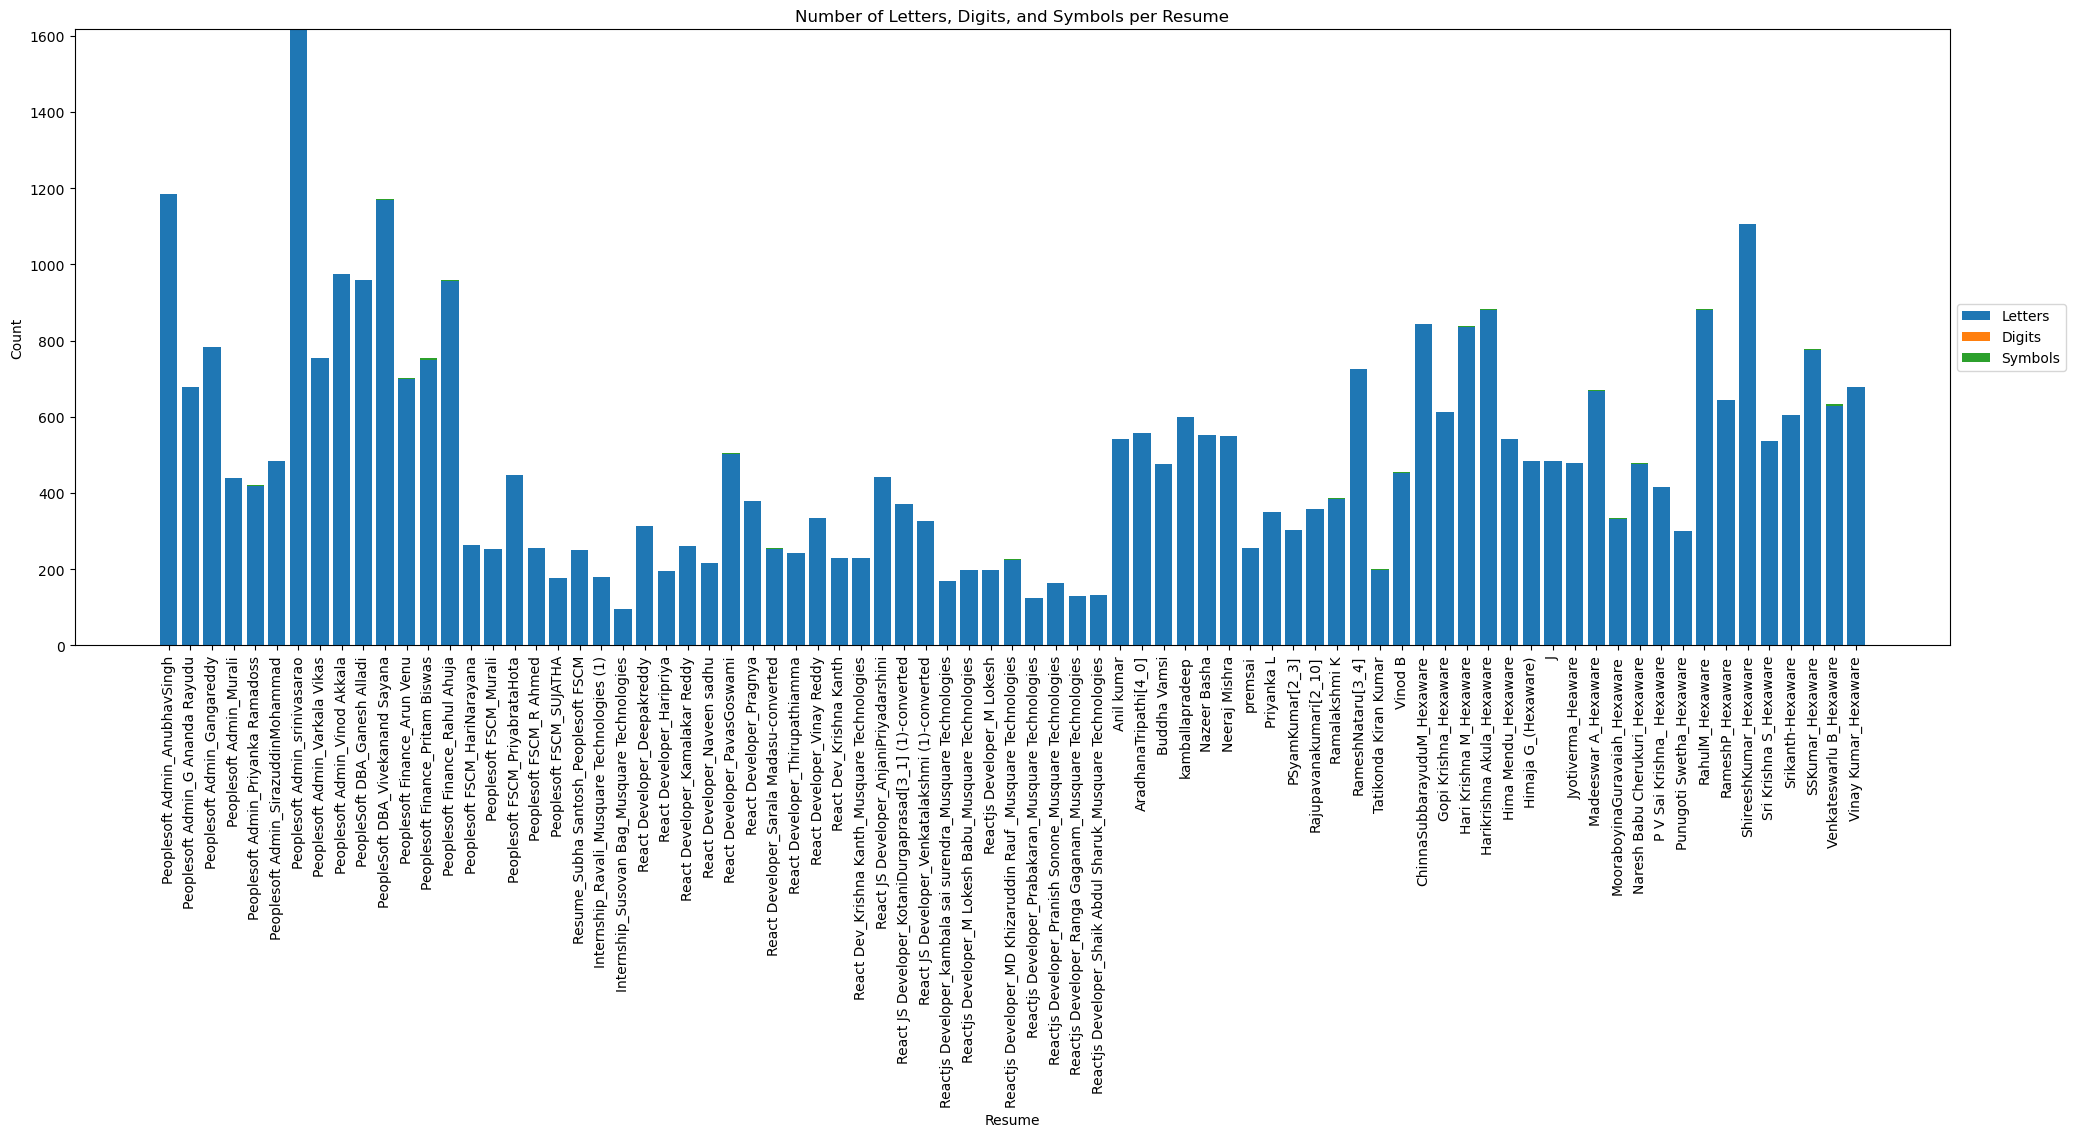

In [85]:
# creating a bar chart of the number of letters, digits, and symbols per resume
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(df1['Name'], df1['Num_Letters'], label='Letters')
ax.bar(df1['Name'], df1['Num_Digits'], bottom=df1['Num_Letters'], label='Digits')
ax.bar(df1['Name'], df1['Num_Symbols'], bottom=df1['Num_Letters']+df1['Num_Digits'], label='Symbols')
plt.xticks(rotation=90) #Set x axis label rotation at 90 degrees
plt.subplots_adjust(right=2) # adjust left margin
plt.title('Number of Letters, Digits, and Symbols per Resume')
plt.xlabel('Resume')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

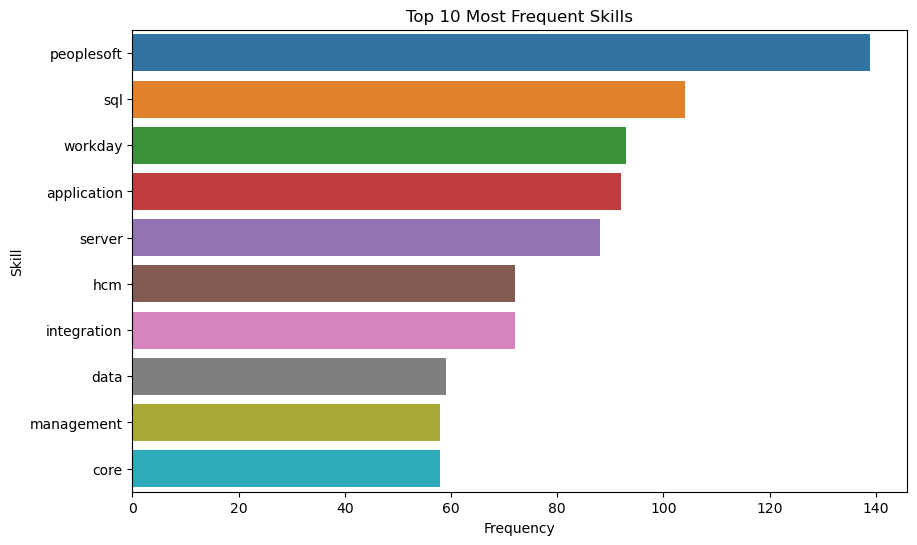

In [86]:
# counting the frequency of each skill
skill_counts = df1['skills'].str.split(' ').explode().str.strip().value_counts()

# creating a bar plot of the top 10 most frequent skills
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts[:10], y=skill_counts[:10].index)
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

In [87]:
df1.skills[5]

'peopletools peoplesoft window sirazuddin silva training certification communication engg hcm fin voya financial insurance interface data mover toad pia finance bangalore oracle cloud infrastructure architect associate oracle cloud infrastructure architect professional fscm configured report node axa unix solaris service peoplesoft database setup microsoft sql management studio india application designer mvgr college engineering peopletools sqldeveloper tws installing oracle tuxedo microsoft sql peoplesoft administrator pum applied peopletools'

In [88]:
df1['y'] = 1 #creating new column y for using labels in pie plot

In [89]:
df1 

,category,Name,skills,Num_Letters,Num_Digits,Num_Symbols,y
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh,peoplesoft upgrade unixlinux server amazon web...,1184,0,0,1
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu,state university peoplesoft peoplesoft securit...,679,0,0,1
2,Peoplesoft,Peoplesoft Admin_Gangareddy,peoplesoft peoplesoft database administrator g...,783,0,0,1
3,Peoplesoft,Peoplesoft Admin_Murali,sysaudit peoplesoft application applied patch ...,439,0,0,1
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss,mountpleasant joseph ’ convent anglo indian gi...,418,0,2,1
...,...,...,...,...,...,...,...
74,workday,Sri Krishna S_Hexaware,position picof inboundoutbound business object...,536,0,0,1
75,workday,Srikanth-Hexaware,p consultant infosys infosys condition etv rep...,604,0,1,1
76,workday,SSKumar_Hexaware,lookup peoplesoft p query ’ xml functional doc...,776,0,1,1
77,workday,Venkateswarlu B_Hexaware,aig picof workday integration development test...,628,0,6,1


<AxesSubplot:ylabel='y'>

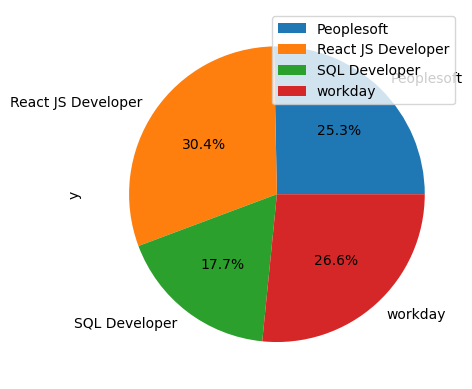

In [90]:
df1.groupby(['category']).sum().plot(kind='pie',y='y', autopct='%1.1f%%')

* **now creating the new dataframe and movig all skills rows to single column using strip function**
* it Removes spaces at the beginning and at the end of the string
* it Remove the leading and trailing characters

In [91]:
for i in range(len(df1.skills)):
    df2 = [skills.strip() for skills in df1.skills] # adding all rows to one column

In [92]:
df2

['peoplesoft upgrade unixlinux server amazon web service weblogic shell peoplesoft hcm application support automationdevops tool imported self signed certificate github managing peoplesoft hcm srm group reviewing vulnerability oracle repository working ansible window unix hcm peoplesoft administration refreshed testing github core competency hrms instance hrms implemented peoplesoft interaction hub upgrade hcm application upgrade instance peoplesoft skill prod techmahindra roleproject peopletools dpk application server dev netapp project peoplesoft campus application upgrade terminal server peoplesoft administration peoplesoft application working knowledge ansible financials project migration migration production created instance security team aws resource rmis application server shell script working vulnerability cpu pum central ibm peopletools installing oracle policy automation window secure enterprise search installed configured s pia psadmin sourcetarget upgraded people tool peopl

In [93]:
len(df2)

79

In [94]:
#pip install sweetviz

**using sweetviz library to auto generate EDA (Optional) as we did all EDA manually**

In [ ]:
#import sweetviz
#my_report = sweetviz.analyze(df1)

In [ ]:
#my_report.show_html()

### Now moving to Feature extraction using TF-IDF vectorizer
* the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set

* TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. 
* TF is how frequent a word occurs in the document
* IDF helps us to find out the rare words occurs in the document. More rare word will get high IDF score 
* sparse metrices are memory efficient data structures that enable us store large matrices with very few non-zero elements aka sparse matrices

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from scipy.sparse import hstack # Hstack metrics to stack metrics column-wise(Horizontally)

In [97]:
x = df1['skills']
y = df1['category']

word_vectorizer = TfidfVectorizer(sublinear_tf=True)
word_vectorizer.fit(x)
x = word_vectorizer.transform(x)

In [98]:
x

<79x1424 sparse matrix of type '<class 'numpy.float64'>'
	with 4166 stored elements in Compressed Sparse Row format>

In [99]:
word_vectorizer.vocabulary_  # to show aasigned numeric values to each word

{'peoplesoft': 933,
 'upgrade': 1335,
 'unixlinux': 1331,
 'server': 1140,
 'amazon': 47,
 'web': 1383,
 'service': 1142,
 'weblogic': 1384,
 'shell': 1149,
 'hcm': 562,
 'application': 71,
 'support': 1231,
 'automationdevops': 100,
 'tool': 1290,
 'imported': 621,
 'self': 1134,
 'signed': 1153,
 'certificate': 197,
 'github': 527,
 'managing': 770,
 'srm': 1193,
 'group': 545,
 'reviewing': 1091,
 'vulnerability': 1380,
 'oracle': 892,
 'repository': 1073,
 'working': 1405,
 'ansible': 63,
 'window': 1392,
 'unix': 1330,
 'administration': 21,
 'refreshed': 1057,
 'testing': 1275,
 'core': 276,
 'competency': 239,
 'hrms': 591,
 'instance': 647,
 'implemented': 618,
 'interaction': 659,
 'hub': 596,
 'skill': 1162,
 'prod': 996,
 'techmahindra': 1256,
 'roleproject': 1101,
 'peopletools': 934,
 'dpk': 381,
 'dev': 355,
 'netapp': 855,
 'project': 1006,
 'campus': 179,
 'terminal': 1271,
 'knowledge': 713,
 'financials': 481,
 'migration': 804,
 'production': 998,
 'created': 286,
 '

In [100]:
print(x) #to check the TF-IDF scre of word in rows 0 is forst row

  (0, 1405)	0.14513046701443122
  (0, 1401)	0.09301093773343465
  (0, 1392)	0.10971261958511563
  (0, 1384)	0.07171301014347976
  (0, 1383)	0.05410430508859968
  (0, 1380)	0.1723882716430924
  (0, 1336)	0.10181529026087467
  (0, 1335)	0.17077358459967618
  (0, 1332)	0.06686762529850042
  (0, 1331)	0.10181529026087467
  (0, 1330)	0.06290865761603973
  (0, 1290)	0.14118182492409326
  (0, 1275)	0.05293027835553829
  (0, 1271)	0.10181529026087467
  (0, 1258)	0.10181529026087467
  (0, 1256)	0.09301093773343465
  (0, 1253)	0.06290865761603973
  (0, 1231)	0.06117059384306361
  (0, 1193)	0.10181529026087467
  (0, 1180)	0.10181529026087467
  (0, 1162)	0.09160655161691766
  (0, 1153)	0.10181529026087467
  (0, 1149)	0.1820843118301348
  (0, 1142)	0.040942547917838225
  (0, 1140)	0.11005459250356235
  :	:
  (78, 476)	0.08663535101164997
  (78, 423)	0.07140749451851522
  (78, 400)	0.18072322927857148
  (78, 374)	0.08887068172119922
  (78, 358)	0.1387802453063768
  (78, 357)	0.11632266171042295
  (7

#### Splitting data into train and test for use in model

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.20, shuffle = True, stratify=y)
x_train.shape, x_test.shape

((63, 1424), (16, 1424))

* As our y (catagory) has imbalance values, we are using stratify to obtain the same sample proportion for a train and test set if there is an imbalance in the dataset.

## Starting the modeling now

### Naive Bayes

In [102]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
y_pred_train = NB.predict(x_train)
y_pred_test = NB.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix

In [103]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro')) #'macro' Calculate metrics for each label, and find their unweighted mean
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))


Train Accuracy : 1.0
Test accuracy :  0.8125
Train recall score is  1.0
Test recall score is  0.7916666666666666
Train precision score : 1.0
Test precision score : 0.8785714285714286
Train f1 score is  1.0
Test f1 score is  0.7972222222222222
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[2 1 0 1]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


### K nearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5,p=2)
Knn.fit(x_train, y_train)
y_pred_train = Knn.predict(x_train)
y_pred_test = Knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [105]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 0.9523809523809523
Test accuracy :  0.9375
Train recall score is  0.9484898325358851
Test recall score is  0.9375
Train precision score : 0.9605263157894737
Test precision score : 0.95
Train f1 score is  0.9529839383404748
Test f1 score is  0.9365079365079365
Train confusion matrix : 
 [[15  0  0  1]
 [ 0 18  0  1]
 [ 0  1 10  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[3 0 0 1]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


### LogisticRegression

In [106]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)


In [107]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 1.0
Test accuracy :  0.875
Train recall score is  1.0
Test recall score is  0.8541666666666666
Train precision score : 1.0
Test precision score : 0.9285714285714286
Train f1 score is  1.0
Test f1 score is  0.8726190476190476
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[3 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features=14,max_samples=0.8)
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

In [109]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 1.0
Test accuracy :  0.8125
Train recall score is  1.0
Test recall score is  0.7916666666666666
Train precision score : 1.0
Test precision score : 0.90625
Train f1 score is  1.0
Test f1 score is  0.808974358974359
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[2 2 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


### Support vector machine

A Support Vector Machine (SVM) can be imagined as a surface that creates a boundary between points of data
plotted in multidimensional that represent examples and their feature values
The goal of a SVM is to create a flat boundary called a hyperplane, which divides the space to create fairly
homogeneous partitions on either side

* The RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other. This kernel can be mathematically represented as follows:
* where,
* 1. ‘σ’ is the variance and our hyperparameter
* 2. ||X₁ - X₂|| is the Euclidean (L₂-norm) Distance between two points X₁ and X₂

In [110]:
from sklearn.svm import SVC
SVC = SVC(kernel="rbf",C=2)
SVC.fit(x_train, y_train)
y_pred_train = SVC.predict(x_train)
y_pred_test = SVC.predict(x_test)

In [111]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 1.0
Test accuracy :  0.8125
Train recall score is  1.0
Test recall score is  0.7916666666666666
Train precision score : 1.0
Test precision score : 0.90625
Train f1 score is  1.0
Test f1 score is  0.808974358974359
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[2 2 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [112]:
from sklearn.svm import SVC
SVC = SVC(kernel="linear",C=2)
SVC.fit(x_train, y_train)
y_pred_train = SVC.predict(x_train)
y_pred_test = SVC.predict(x_test)

In [113]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 1.0
Test accuracy :  1.0
Train recall score is  1.0
Test recall score is  1.0
Train precision score : 1.0
Test precision score : 1.0
Train f1 score is  1.0
Test f1 score is  1.0
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


## Bagging
Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once

* max_features=0.9: The maximum number of features to consider for each base estimator during training. The value of 0.9 means that each base estimator will use 90% of the features, which introduces some randomness to the model.
* n_estimators=10: The number of base estimators (in this case, 10) to create for the ensemble. Each base estimator is a separate classifier, and they are trained independently.
* max_samples=0.8: The maximum number of samples to consider for each base estimator during training. The value of 0.8 means that each base estimator will use 80% of the training samples, which introduces some randomness to the model.

In [114]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(max_features=0.9,n_estimators=10,max_samples=0.8) #
Bag.fit(x_train,y_train)
y_pred_train = Bag.predict(x_train)
y_pred_test = Bag.predict(x_test)

In [115]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 1.0
Test accuracy :  1.0
Train recall score is  1.0
Test recall score is  1.0
Train precision score : 1.0
Test precision score : 1.0
Train f1 score is  1.0
Test f1 score is  1.0
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


## Gradient Boost 
Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent

* learning_rate=0.01: This parameter controls the step size at each iteration while moving towards a minimum of the loss function. A smaller learning rate typically requires more iterations to converge, but it can lead to better generalization.
* n_estimators=10: The number of boosting stages (weak learners or decision trees) to be combined to form the final ensemble. In this case, 10 decision trees will be sequentially built to improve the model's predictions.

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.01,n_estimators=10)
GBC.fit(x_train,y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test = GBC.predict(x_test)


In [117]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 0.8253968253968254
Test accuracy :  0.75
Train recall score is  0.75
Test recall score is  0.6875
Train precision score : 0.6583333333333333
Test precision score : 0.6388888888888888
Train f1 score is  0.6938775510204082
Test f1 score is  0.6428571428571429
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0 11  0  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 3 0 0]
 [0 1 0 3]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## AdaBoost 
AdaBoost (Adaptive Boosting) is an ensemble learning technique that sequentially builds multiple weak learners (e.g., decision trees) and assigns higher weights to misclassified instances to focus on difficult examples.

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(learning_rate=0.02,n_estimators=10)
ABC.fit(x_train,y_train)
y_pred_train = ABC.predict(x_train)
y_pred_test = ABC.predict(x_test)

In [119]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 0.9841269841269841
Test accuracy :  0.9375
Train recall score is  0.9772727272727273
Test recall score is  0.9375
Train precision score : 0.9875
Test precision score : 0.9583333333333334
Train f1 score is  0.9816849816849818
Test f1 score is  0.9415584415584416
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  1 10  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 1 0 3]]


## Decision tree 
It is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

Gini impurity is the probability of incorrectly classifying random data point in the dataset if it were labeled based on the class distribution of the dataset
* criterion='gini': The criterion used to measure the quality of a split. In this case, 'gini' impurity is used, which is a measure of the impurity of the target classes in a node.
* max_depth=6: The maximum depth of the decision tree. This parameter limits the number of levels the tree can grow. A smaller max_depth can help prevent overfitting.
* max_features=0.7: The number of features to consider when looking for the best split. This parameter introduces some randomness into the model, as only 70% of the features will be considered for each split.

In [120]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',max_depth=6,max_features=0.7)
DT.fit(x_train,y_train)
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)

In [121]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 1.0
Test accuracy :  0.9375
Train recall score is  1.0
Test recall score is  0.9166666666666666
Train precision score : 1.0
Test precision score : 0.9583333333333334
Train f1 score is  1.0
Test f1 score is  0.9272727272727272
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Using Entropy
* Entropy is a concept that stems from information theory, which measures the impurity of the sample values. It is defined with by the following formula, where

In [122]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=0.7)
DT.fit(x_train,y_train)
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)

In [123]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("Test accuracy : ",accuracy_score(y_test, y_pred_test))
print("Train recall score is ",recall_score(y_train, y_pred_train,average = 'macro'))
print("Test recall score is ",recall_score(y_test, y_pred_test,average = 'macro'))
print("Train precision score :",precision_score(y_train, y_pred_train,average = 'macro'))
print("Test precision score :",precision_score(y_test, y_pred_test,average = 'macro'))
print("Train f1 score is ",f1_score(y_train, y_pred_train,average = 'macro'))
print("Test f1 score is ",f1_score(y_test, y_pred_test,average = 'macro'))
print("Train confusion matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_test))

Train Accuracy : 1.0
Test accuracy :  0.9375
Train recall score is  1.0
Test recall score is  0.9375
Train precision score : 1.0
Test precision score : 0.9583333333333334
Train f1 score is  1.0
Test f1 score is  0.9415584415584416
Train confusion matrix : 
 [[16  0  0  0]
 [ 0 19  0  0]
 [ 0  0 11  0]
 [ 0  0  0 17]]
Test confusion matrix : 
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 1 0 3]]


## Now Pridicting the data using Model

In [124]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True) #sublinear_tf=True, which applies sublinear scaling to the term frequency. Sublinear scaling scales the term frequency logarithmically, reducing the impact of very common words and giving more weight to rarer words.
word_vectorizer.fit(df1['skills'])
skills1 = word_vectorizer.transform([df1['skills'][0]]) #passing 1st row
skills49 = word_vectorizer.transform([df1['skills'][48]]) #passing 48th row
Skills72 = word_vectorizer.transform([df1['skills'][71]]) #passing 72nd row

pridicting "skills" belongs to which category using KNN model

In [125]:
pred1 = Knn.predict(skills1)
pred2 = Knn.predict(skills49)
pred3 = Knn.predict(Skills72)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [126]:
print(pred1,pred2,pred3)

['Peoplesoft'] ['SQL Developer'] ['workday']


### Saving model using pickle
#The code saves the machine learning model Knn to a file named "modelKnn.pkl" using the pickle.dump() function.

In [127]:
import pickle 

# saving the model

filename='trained_model.sav'
pickle.dump(Knn,open(filename,'wb'))#writing the binary format

In [128]:
# loading the saved model and predicting the resume category
loaded_model=pickle.load(open('trained_model.sav','rb'))#rb=reading binabry format

In [129]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True) #sublinear_tf=True, which applies sublinear scaling to the term frequency. Sublinear scaling scales the term frequency logarithmically, reducing the impact of very common words and giving more weight to rarer words.
word_vectorizer.fit(df1['skills'])
skills2 = word_vectorizer.transform([df1['skills'][2]]) #passing 2nd row
skills50 = word_vectorizer.transform([df1['skills'][49]]) #passing 50th row
Skills71 = word_vectorizer.transform([df1['skills'][70]]) #passing 71st row

In [130]:
pred4 = loaded_model.predict(skills2)
pred5 = loaded_model.predict(skills50)
pred6 = loaded_model.predict(Skills71)

In [131]:
print(pred4,pred5,pred6)

['Peoplesoft'] ['SQL Developer'] ['workday']


In [132]:
#pip install tensorflow